<a href="https://colab.research.google.com/github/almost232/summer-school/blob/main/Lab2_PartA_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| | |
|:---:|:---|
| <img src="https://i.ytimg.com/vi/1W-sWmFQPZY/sddefault.jpg" width="200"/> |  <strong><font size=5>Future x Summer School 2025 </font></strong><br><br><strong><font color="#1A54A6" size=5>LLMs<br>Lab 2 Part A: Embeddings in Context (DEMO)</font></strong>|

---



**Instructor:**  
Pavlos Protopapas  

**Teaching Team:**  
Nawang Thinley Bhutia




In this notebook, we will explore how context can impact embeddings. We first use word2vec and oserve **static embeddings** and then assess how using a model like BERT (Bidirectional Encoder Representations from Transformers) can give us enganced **contextualised embeddings**.

**📝 Make a Copy to Edit**

This notebook is **view-only**. To edit it, follow these steps:

1. Click **File** > **Save a copy in Drive**.
2. Your own editable copy will open in a new tab.

Now you can modify and run the code freely!



## Table of Contents
 **Part A**


- <font color ='#CE6DFF'>**Using Word2Vec**</font>
    -   Extracting relevant embeddings
    -   Applying dimensionality reduction
    -   Exploring word embeddings
-<font color ='#34B086'>**Using BERT**</font>
    -   Extracting relevant embeddings
    -   Applying dimensionality reduction
    -   Exploring word embeddings

- <font color ='1A54A6'>**Take Home Exercise**🏡


---



## **Importing the require libraries**

In [1]:
pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.3 MB/s eta 0:00:00


In [2]:
import numpy as np

#for dimensionality reduction
from sklearn.decomposition import PCA

#for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#from plotly.subplots import make_subplots


#for text preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Sample Sentences**

In [3]:
sentences = [
    "I am going to the bank to withdraw money",
    "He is sitting on the river bank",
    "She went to the bank to deposit a check",
    "They had a picnic by the river bank",
    "I need to withdraw cash from the bank",
    "The kids are playing on the river bank"
]

In [4]:
#remember your preprocessing steps from lab 1
stop_words = set(stopwords.words('english')) #these are typical stop words in english like a, an , the

#lets see what words remain once we remove stopwords
words_of_interest = [word for sentence in sentences for word in sentence.lower().split() if word not in stop_words]
print(words_of_interest)

['going', 'bank', 'withdraw', 'money', 'sitting', 'river', 'bank', 'went', 'bank', 'deposit', 'check', 'picnic', 'river', 'bank', 'need', 'withdraw', 'cash', 'bank', 'kids', 'playing', 'river', 'bank']



# <font color ='#CE6DFF'>**Using Word2Vec**</font>

## **Loading pretrained word2vec model**

Just like we did for Lab 1 (PartB)!


In [1]:
# Load pre-trained Word2Vec model (Google News vectors) using gensim downloader
# Note: This cell can take upto 10+ minutes to load the entire model

# 首先确保安装了gensim
try:
    import gensim.downloader as api
except ImportError:
    !pip install gensim
    import gensim.downloader as api

if 'model_google_w2v' in locals():
    print('Model already exists, using existing model')
else:
    print('Model does not exist, loading model')
    model_google_w2v = api.load('word2vec-google-news-300')

Model does not exist, loading model
[==================================================] 100.0% 1662.8/1662.8MB downloaded



## **Extract Embeddings for all words**

In [3]:
import numpy as np

# 1. 定义你感兴趣的单词列表
words_of_interest = ['apple', 'banana', 'computer', 'science', 'happy', 'sad', 'dog', 'cat']

# 2. 检查模型是否已加载
if 'model_google_w2v' not in locals():
    print("请先加载word2vec模型")
else:
    # 3. 收集存在的单词及其向量
    word_vector_pairs = [(word, model_google_w2v[word]) for word in words_of_interest if word in model_google_w2v]

    # 4. 提取向量创建numpy数组
    word_vectors = np.array([pair[1] for pair in word_vector_pairs])

    # 打印结果
    print(f"找到 {len(word_vectors)} 个单词的向量")
    print("向量形状:", word_vectors.shape)

找到 8 个单词的向量
向量形状: (8, 300)


In [4]:
word_vectors.shape

(8, 300)

### **Dimensionality reduction**

In [6]:
# 1. 导入所有必要的库
from sklearn.decomposition import PCA
import numpy as np

# 2. 确保已有word_vectors数据
# (假设word_vectors是之前步骤生成的300维词向量数组)

# 3. 使用PCA降维到2维
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(word_vectors)

# 4. 查看结果
print("降维后的形状:", embeddings_2d_pca.shape)
print("前5个2D嵌入:\n", embeddings_2d_pca[:5])
print("解释方差比例:", pca.explained_variance_ratio_)

降维后的形状: (8, 2)
前5个2D嵌入:
 [[ 1.3047789  -1.4407307 ]
 [ 1.0551658  -1.381914  ]
 [ 0.800142    0.37812236]
 [ 1.3731421   1.0849917 ]
 [-0.4330504   1.3653991 ]]
解释方差比例: [0.25008023 0.24741721]


## **Plot the Embeddings**

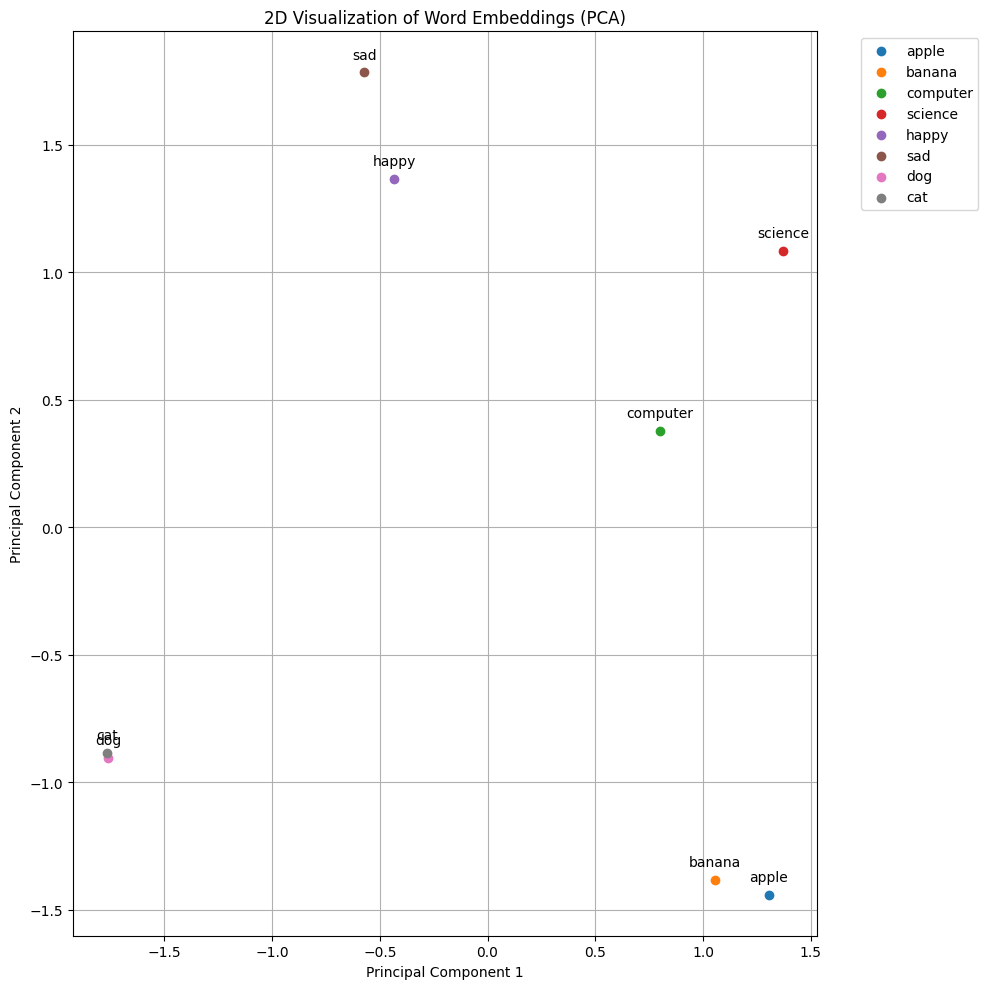

In [9]:
# 1. 导入所有必要的库
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 2. 假设已有以下数据:
# word_vector_pairs = [(word1, vec1), (word2, vec2), ...]
# word_vectors = np.array([v for _, v in word_vector_pairs])

# 3. PCA降维
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(word_vectors)

# 4. 绘制结果
plt.figure(figsize=(10, 10))
for i, (word, _) in enumerate(word_vector_pairs):
    plt.scatter(embeddings_2d_pca[i, 0], embeddings_2d_pca[i, 1], label=word)
    plt.annotate(word,
                (embeddings_2d_pca[i, 0], embeddings_2d_pca[i, 1]),
                xytext=(0,10),
                textcoords="offset points",
                ha="center")
plt.title('2D Visualization of Word Embeddings (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放在图表外侧
plt.tight_layout()  # 自动调整布局
plt.show()

### We can see that there is only one embedding per word.

### However, overlapping points are not clear enough here so let us try plotly (another alternative to matplotlib)

In [11]:
# 1. 导入所有必要的库
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np

# 2. 假设已有以下数据:
# word_vector_pairs = [(word1, vec1), (word2, vec2), ...]
# word_vectors = np.array([v for _, v in word_vector_pairs])

# 3. PCA降维
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(word_vectors)

# 4. 创建交互式可视化
fig = go.Figure()

for i, (word, _) in enumerate(word_vector_pairs):
    fig.add_trace(
        go.Scatter(
            x=[embeddings_2d_pca[i, 0]],
            y=[embeddings_2d_pca[i, 1]],
            mode='markers+text',
            text=[word],
            textposition='top center',
            marker=dict(size=10, color=i, colorscale='Viridis'),
            name=word,
            hoverinfo='text',
            hovertext=f"{word}<br>PC1: {embeddings_2d_pca[i, 0]:.3f}<br>PC2: {embeddings_2d_pca[i, 1]:.3f}"
        )
    )

fig.update_layout(
    title=f"2D Word Embeddings (PCA) - {len(word_vector_pairs)} words",
    xaxis_title=f"PC1 (Variance: {pca.explained_variance_ratio_[0]*100:.1f}%)",
    yaxis_title=f"PC2 (Variance: {pca.explained_variance_ratio_[1]*100:.1f}%)",
    template='plotly_white'
)

fig.show()

# <font color ='#34B086'>**Using BERT**</font>

Now let us try to use BERT and compare our results

In [12]:
#using the transformers library
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

### Generate Word Embeddings with BERT


In [13]:
# Load BERT Model and Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were 

##### (Note: You can safely ignore these warning we do not need a HF_TOKEN for our use case right now and we do not need extra weights as we are not training.)

### Tokenize sentences and get embeddings

In [14]:
#let's create a function to get our embeddings
def get_bert_embeddings(sentences):
    inputs = tokenizer(sentences, return_tensors='tf', padding=True, truncation=True, max_length=128)
    outputs = model_bert(inputs)
    embeddings = outputs.last_hidden_state #these are the ebeddings!
    return embeddings

In [17]:
# 1. 首先定义要分析的句子列表
sentences = [
    "This is an example sentence for BERT embeddings.",
    "BERT can generate contextualized word embeddings.",
    "The embeddings will capture the meaning of words in context."
]

# 2. 确保 get_bert_embeddings 函数可用
# 如果你使用的是transformers库，可以这样定义：
from transformers import BertTokenizer, BertModel
import torch

def get_bert_embeddings(sentences):
    # 加载预训练BERT模型和tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # 对句子进行编码并获取嵌入
    inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # 返回最后一层的隐藏状态（即词嵌入）
    return outputs.last_hidden_state

# 3. 现在可以获取嵌入
embeddings = get_bert_embeddings(sentences)
print(f"获取到 {len(sentences)} 个句子的嵌入")
print(f"嵌入张量形状: {embeddings.shape}")  # 应该是 (句子数, 最大token数, 嵌入维度)

获取到 3 个句子的嵌入
嵌入张量形状: torch.Size([3, 16, 768])


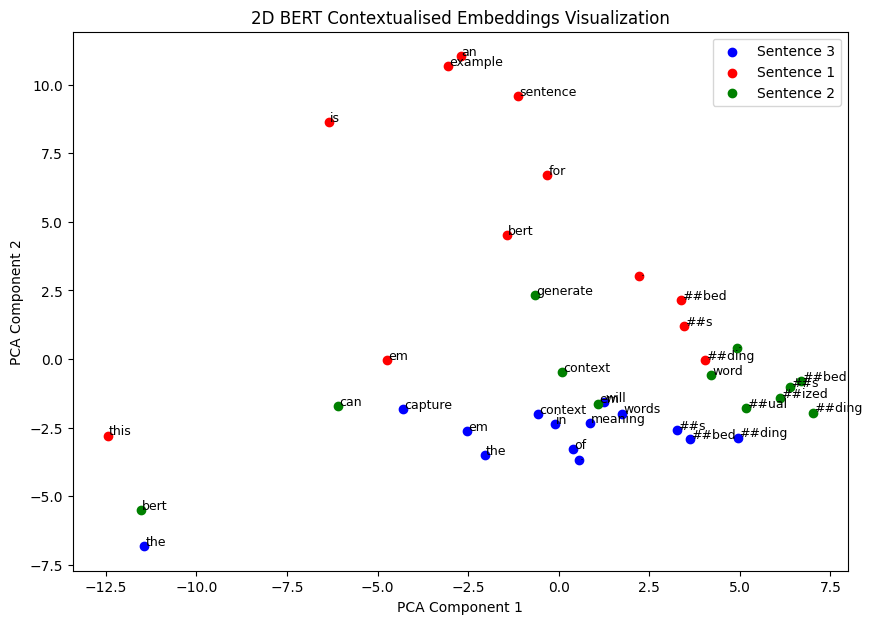

In [18]:
#@title ###**Plotting 2D BERT embeings using matplotlib**
# Extract embeddings for each word
word_vectors = []
labels = []
colors = []

# Define a color for each sentence
color_map = {
    0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y'
}

for i, sentence in enumerate(sentences):
    tokens = tokenizer.tokenize(sentence)
    for j, token in enumerate(tokens):
        word_vectors.append(embeddings[i][j].numpy())
        labels.append(token)
        colors.append(color_map[i])

# Dimensionality Reduction
# Apply PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Interactive Visualization
# Initialize Plot
plt.figure(figsize=(10, 7))
scatter_plots = []
unique_colors = set(colors)
for color in unique_colors:
    indices = [i for i, c in enumerate(colors) if c == color]
    scatter = plt.scatter(word_vectors_2d[indices, 0], word_vectors_2d[indices, 1], c=color, label=f"Sentence {list(color_map.keys())[list(color_map.values()).index(color)] + 1}")
    scatter_plots.append(scatter)

# Add text labels for each word
for i, label in enumerate(labels):
    x, y = word_vectors_2d[i, :]
    plt.text(x + 0.03, y + 0.03, label, fontsize=9)

# Create a legend
plt.legend(loc="best")

plt.title("2D BERT Contextualised Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()

### let's try plotly version to see overlapping points better

In [19]:
#@title ###**Plotting 2D BERT embeings using plotly**
# Extract embeddings for each word
word_vectors = []
labels = []
colors = []

# Define a color for each sentence
color_map = {
    0: 'red', 1: 'green', 2: 'blue', 3: 'cyan', 4: 'magenta', 5: 'yellow'
}

for i, sentence in enumerate(sentences):
    tokens = tokenizer.tokenize(sentence)
    for j, token in enumerate(tokens):
        word_vectors.append(embeddings[i][j].numpy())
        labels.append(token)
        colors.append(color_map[i])  # Use the full color name here

# Dimensionality Reduction
# Apply PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Interactive Visualization
# Initialize Plotly figure
fig = go.Figure()

# Add points for each token
for i, label in enumerate(labels):
    fig.add_trace(go.Scatter(
        x=[word_vectors_2d[i, 0]],
        y=[word_vectors_2d[i, 1]],
        mode='markers+text',
        name=label,
        text=[label],
        textposition='top center',
        marker=dict(color=colors[i])
    ))

# Add buttons to toggle visibility of each sentence
buttons = []
for color in set(color_map.values()):  # Iterate over full color names
    indices = [i for i, c in enumerate(colors) if c == color]
    sentence_index = list(color_map.keys())[list(color_map.values()).index(color)]
    buttons.append(
        dict(
            label=f"Sentence {sentence_index + 1}",
            method="update",
            args=[{"visible": [i in indices for i in range(len(labels))]}]
        )
    )

# Add a button to show all
buttons.append(
    dict(
        label="Show All",
        method="update",
        args=[{"visible": [True] * len(labels)}]
    )
)

# Add a button to hide all
buttons.append(
    dict(
        label="Hide All",
        method="update",
        args=[{"visible": [False] * len(labels)}]
    )
)

# Update layout with buttons
fig.update_layout(
    title="2D BERT Contextualised Embeddings Visualization",
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    updatemenus=[dict(type="buttons", showactive=True, buttons=buttons)]
)

# Show plot
fig.show()

### <font color ='#34B086'>**What do you notice from the plot above? How does *context* improve the embeddings?**</font>

Pay close attention to the clusters that emerge. The word bank now has 3 embeddings near words like river and picnic and the other three near bank, check, cash etc.

### Here is a brief comparision of the two approaches we looked at:

- **Embedding Type**:
  - **word2vec**: Static embeddings (single vector per word).
  - **BERT**: Contextualized embeddings (different vectors for the same word based on context).

- **Model Architecture**:
  - **word2vec**: Shallow neural network.
  - **BERT**: Deep transformer architecture.

- **Contextual Understanding**:
  - **word2vec**: Ignores context; words with multiple meanings have a single representation.
  - **BERT**: Incorporates context; words with multiple meanings have different representations based on their context.

- **Training Objective**:
  - **word2vec**: Trained using Skip-gram or CBOW models to predict nearby words.
  - **BERT**: Trained using masked language modeling (MLM) and next sentence prediction (NSP).

- **Directionality**:
  - **word2vec**: Processes words in one direction (context is limited to nearby words).
  - **BERT**: Bidirectional (considers the full sentence context, both before and after the target word).

- **Performance on NLP Tasks**:
  - **word2vec**: Good for basic semantic similarity tasks.
  - **BERT**: Superior performance on a wide range of NLP tasks, including question answering and text classification.


## <font color ='1A54A6'>**Take Home Exercise**🏡


Test this notebook with your own sentences where context impacts word meanings directly.

### **BONUS**:
Refer to [this](https://github.com/tensorflow/text/blob/master/docs/tutorials/word2vec.ipynb) official word2vec notebook from tensorflow or the BERT information page on HuggingFace [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForMaskedLM.forward) for even more details. (not needed for this course)